# Song Recommendations

**Business case:**

Your product will take a song as an input from the user and will output another song (the recommendation). In most cases, the recommended song will have to be similar to the inputted song, but the CTO thinks that if the song is on the top charts at the moment, the user will enjoy more a recommendation of a song that's also popular at the moment.

## Loading the libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

# Song Recommendations | Prototype 1

**Planning:**

    - scrape "hot songs" from several websites
    - concat dataframes vertically & store dataframe in a .csv-file
    - (update the scraped data weekly)
    - get user input
    - check if song is in the dataframe
        - if song is in the dataframe: randomly recommend another song from the dataframe
        - if song is not in the dataframe: return no recommendation

## Scrape "hot songs" from several websites

### billboard

In [2]:
def scrape_billboard(url):
    
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        
        song = []
        artist = []
        num_iter = len(soup.select("ol li"))
        
        for i in range(num_iter):    
            song.append(soup.select(".chart-element__information__song")[i].get_text())
            artist.append(soup.select(".chart-element__information__artist")[i].get_text())
            bb = pd.DataFrame({'artist': artist, 'song': song})
        
        return bb
        
    else: 
        print('Error: Website is not working!')
        return

In [3]:
#url = "https://www.billboard.com/charts/hot-100"
bb = scrape_billboard("https://www.billboard.com/charts/hot-100")
bb

,artist,song
0,Olivia Rodrigo,Drivers License
1,Ariana Grande,34+35
2,Lil Tjay Featuring 6LACK,Calling My Phone
3,The Weeknd,Blinding Lights
4,Cardi B,Up
...,...,...
95,Jordan Davis,Almost Maybes
96,Saweetie Featuring Jhene Aiko,Back To The Streets
97,Juice WRLD & Young Thug,Bad Boy
98,YBN Nahmir Featuring 21 Savage,Opp Stoppa


### tonspion

In [4]:
def scrape_tonspion(url):
    
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        
        artist_song = []
        num_iter = len(soup.select("ol li"))
        
        for i in range(num_iter):    
            artist_song.append(soup.select("ol li")[i].get_text())
            tsp = pd.DataFrame({'artist_song': artist_song})
            tsp[['artist', 'song']] = tsp['artist_song'].str.split(' - ', 1, expand=True)
            tsp.drop(columns = "artist_song",inplace=True)
        
        return tsp
        
    else: 
        print('Error: Website is not working!')
        return

In [5]:
tsp = scrape_tonspion("https://www.tonspion.de/news/playlist-die-besten-deutschsprachigen-lieder")
tsp

,artist,song
0,Beginner & Samy Deluxe,Füchse
1,Casper,Im Ascheregen
2,Chefket,Rap & Soul
3,Fatoni & Dexter,32 Grad
4,K.I.Z & Henning May,Hurra die Welt geht unter
...,...,...
95,Marteria,Endboss
96,Die Orsons,Schwung in die Kiste
97,Casper & Blixa Bargeld & Dagobert & Sizarr,Lang lebe der Tod
98,Einstürzende Neubauten,Yü-Gung (Adrian Sherwood Remix)


### mtv

In [6]:
def scrape_mtv(url):
    
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        
        song = []
        artist = []
        num_iter = len(soup.select(".videoTitle"))
        
        for i in range(num_iter):    
            song.append(soup.select(".videoTitle")[i].get_text())
            artist.append(soup.select(".artist")[i].get_text())
            mtv = pd.DataFrame({'artist': artist, 'song': song})
        
        return mtv
        
    else: 
        print('Error: Website is not working!')
        return

In [7]:
mtv = scrape_mtv("http://www.mtv.de/charts/c6mc86/single-top-100")
mtv

,artist,song
0,Nathan Evans,Wellerman
1,Kasimir1441 & badmomzjay,Ohne dich
2,Jamule & Capital Bra,No comprendo
3,Tiesto,The Business
4,Olivia Rodrigo,drivers license
5,The Weeknd,Save Your Tears
6,Ufo361,Wings
7,Masked Wolf,Astronaut In The Ocean
8,Jason Derulo,Love Not War (The Tampa Beat)
9,Zoe Wees,Girls Like Us


### wikipedia

In [8]:
def scrape_wiki(url):
    
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        
        artist_song_ = []
        num_iter = len(soup.select("tr td ol li"))
        
        for i in range(num_iter):    
            artist_song_.append((soup.select("tr td ol li")[i].get_text()).replace('"', ''))
            wiki = pd.DataFrame({'artist_song_': artist_song_})
            
            wiki[['artist', 'song_']] = wiki['artist_song_'].str.split(' – ', 1, expand=True)
            wiki[['song', 'year_']] = wiki['song_'].str.split('(', 1, expand=True)

            wiki.drop(columns = "artist_song_",inplace=True)
            wiki.drop(columns = "song_",inplace=True)
            wiki.drop(columns = "year_",inplace=True)
        
        return wiki
        
    else: 
        print('Error: Website is not working!')
        return

In [9]:
wiki = scrape_wiki("https://en.wikipedia.org/wiki/Triple_J_Hottest_100")
wiki

,artist,song
0,Joy Division,Love Will Tear Us Apart
1,Hunters & Collectors,Throw Your Arms Around Me
2,The The,Uncertain Smile
3,The Jam,That's Entertainment
4,New Order,Blue Monday
...,...,...
355,Cardi B and Megan Thee Stallion,WAP
356,G Flip,Hyperfine
357,The Jungle Giants,Sending Me Ur Loving
358,Hilltop Hoods,I'm Good?


## Concat dataframes & store as .csv

In [10]:
def hot_songs_final():
    hot_songs = pd.concat([bb, tsp, mtv, wiki], axis=0)
    hot_songs.to_csv(r"C:/Users/josefin/01_IRONHACK/Week7/Day8.2/song_recommendations_prototype1/hot_songs.csv")
    
    return hot_songs

In [87]:
hot_songs = hot_songs_final()
hot_songs

,artist,song
0,Olivia Rodrigo,Drivers License
1,Ariana Grande,34+35
2,Lil Tjay Featuring 6LACK,Calling My Phone
3,The Weeknd,Blinding Lights
4,Cardi B,Up
...,...,...
355,Cardi B and Megan Thee Stallion,WAP
356,G Flip,Hyperfine
357,The Jungle Giants,Sending Me Ur Loving
358,Hilltop Hoods,I'm Good?


## Get user input & make recommendation

In [145]:
def random_song_recommendation():
    
    import random
    song_input = input("Please enter a song here: ")

    if song_input in hot_songs['song'].values:
    
        recommendation = hot_songs['song'].sample()
        print('Here is a hot song recommendation for you: ')
        print(recommendation)
    
    else: 
        print('Your song is not hot enough.')

In [146]:
random_song_recommendation()

Please enter a song here: Up
Here is a hot song recommendation for you: 
37    So wie du bist
Name: song, dtype: object


# Song Recommendations | Prototype 2

    - search for a large playlist on spotify with diverse songs
      (9864 songs on https://open.spotify.com/playlist/7htu5ftbLBRFAwiuHVcUAg?si=lefMFLFuQhO0jCygl6K4gQ)
    - get all songs plus their audio features from the playlist
    - clean data:
        - set song titles to lower case
        - set song id(or  title) as index
        - remove special characters (e.g. ', #, ! etc.)
        - replace vowels with accent (e.g. á = a)
        - remove duplicates (if any)

## Set up Spotify API

In [14]:
#!pip install spotipy

In [15]:
from config import *
import pandas as pd

In [16]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials


#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id = client_id,
                                                           client_secret = client_secret))

## Get songs from a spotify playlist

In [17]:
#choose a playlist
playlist_id = "7htu5ftbLBRFAwiuHVcUAg"
username = "spotify"

In [18]:
#extracting all information from the playlists' songs
def get_playlist_songs(username, playlist_id):
    
    results = sp.user_playlist_tracks(username, playlist_id)
    playlist = results['items']
    
    while results['next']:
        results = sp.next(results)
        playlist.extend(results['items'])
        
    return playlist

playlist_songs = get_playlist_songs(username, playlist_id)

len(playlist_songs)

9988

In [19]:
def get_playlist_info(tracks):
    
    playlist_dict = {}

    for i in range(len(tracks)):
        id_list = []
        id_list.append(tracks[i]["track"]["name"])

        for j in range(len(tracks[i]["track"]["artists"])):
            id_list.append(tracks[i]["track"]["artists"][j]["name"])
            
        playlist_dict[tracks[i]["track"]["id"]]=id_list
        
    return playlist_dict

In [20]:
songs_df = pd.DataFrame.from_dict(get_playlist_info(playlist_songs), orient = 'index')

In [21]:
def clean_songs_df(df):

    #drop columns
    df.drop([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31], axis = 1, inplace = True)
    
    #rename columns
    df.rename(columns={0: 'song', 1: 'artist'}, inplace = True)
    
    #clean all song titles to improve search:
    #(1) set titles to lower case
    df['song'] = df['song'].apply(lambda x: x.lower())
    
    #(2) remove special characters
    spec_chars = ["!",'"',"#","%","(",")","*",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_","`","{","|","}","~","–"]
    
    for char in spec_chars:
        df['song'] = df['song'].str.replace(char, '')
    
    #(3) replace vowels with accent
    vowel_dict = {'é': 'e', 'à' : 'a'}
    df['song'].replace(vowel_dict, regex=True, inplace=True)
    
    return df

In [22]:
clean_songs_df = clean_songs_df(songs_df)
clean_songs_df

,song,artist
2MvvoeRt8NcOXWESkxWn3g,ribs,Lorde
6UFivO2zqqPFPoQYsEMuCc,bags,Clairo
4Musyaro0NM5Awx8b5c627,the man who can't be moved,The Script
1CkvWZme3pRgbzaxZnTl5X,rolling in the deep,Adele
4lLtanYk6tkMvooU0tWzG8,grenade,Bruno Mars
...,...,...
2foI6dVPMRC7B3qwjca19u,dream a little dream,Robbie Williams
1ZfK0enTcbDvb3LznGG7Wl,can't take my eyes off you x make up for ever,Jessie J
1GE57bvEZMZijuQAbQve3H,штрихи,Burito
7jA5OcunWRSYXq98puhAX8,for the damaged coda,Blonde Redhead


## Get audio features for the songs

In [23]:
def get_audio_features(tracks):
    
    audio_features = {}
    
    for i in range(len(tracks)):
        audio_features[tracks[i]["track"]["id"]] = sp.audio_features(tracks[i]["track"]["uri"])
    
    return audio_features

audio_features = get_audio_features(playlist_songs)

In [24]:
def df_for_features(song_features): 
    
    song_id = list(song_features.keys()) 
    features = list(song_features[song_id[0]][0])

    feature_dict = {}

    for i in range(len(features)):
        value_list=[]

        for j in range(len(song_features)): 

            result = song_features[song_id[j]][0][features[i]]
            value_list.append(result)
            feature_dict[features[i]] = value_list

    df = pd.DataFrame.from_dict(feature_dict)

    return df

feature_df = df_for_features(audio_features)
feature_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.511,0.472,4,-9.277,1,0.0910,0.534,0.614000,0.1100,0.0399,127.978,audio_features,2MvvoeRt8NcOXWESkxWn3g,spotify:track:2MvvoeRt8NcOXWESkxWn3g,https://api.spotify.com/v1/tracks/2MvvoeRt8NcO...,https://api.spotify.com/v1/audio-analysis/2Mvv...,258969,4
1,0.742,0.546,1,-7.694,1,0.0315,0.172,0.380000,0.1150,0.8680,104.996,audio_features,6UFivO2zqqPFPoQYsEMuCc,spotify:track:6UFivO2zqqPFPoQYsEMuCc,https://api.spotify.com/v1/tracks/6UFivO2zqqPF...,https://api.spotify.com/v1/audio-analysis/6UFi...,260520,4
2,0.609,0.629,10,-5.024,1,0.0264,0.425,0.000000,0.0978,0.3250,99.955,audio_features,4Musyaro0NM5Awx8b5c627,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467,4
3,0.729,0.756,8,-5.119,1,0.0294,0.131,0.000000,0.0527,0.5220,104.945,audio_features,1CkvWZme3pRgbzaxZnTl5X,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4
4,0.706,0.558,2,-7.237,0,0.0593,0.146,0.000000,0.1180,0.2270,110.443,audio_features,4lLtanYk6tkMvooU0tWzG8,spotify:track:4lLtanYk6tkMvooU0tWzG8,https://api.spotify.com/v1/tracks/4lLtanYk6tkM...,https://api.spotify.com/v1/audio-analysis/4lLt...,223253,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,0.415,0.339,0,-10.278,1,0.0316,0.703,0.000000,0.1750,0.3400,131.765,audio_features,2foI6dVPMRC7B3qwjca19u,spotify:track:2foI6dVPMRC7B3qwjca19u,https://api.spotify.com/v1/tracks/2foI6dVPMRC7...,https://api.spotify.com/v1/audio-analysis/2foI...,213747,3
9964,0.494,0.531,7,-8.146,1,0.4180,0.586,0.000000,0.3250,0.2120,79.220,audio_features,1ZfK0enTcbDvb3LznGG7Wl,spotify:track:1ZfK0enTcbDvb3LznGG7Wl,https://api.spotify.com/v1/tracks/1ZfK0enTcbDv...,https://api.spotify.com/v1/audio-analysis/1ZfK...,170427,4
9965,0.534,0.802,7,-4.669,0,0.2190,0.154,0.000004,0.1710,0.7480,179.998,audio_features,1GE57bvEZMZijuQAbQve3H,spotify:track:1GE57bvEZMZijuQAbQve3H,https://api.spotify.com/v1/tracks/1GE57bvEZMZi...,https://api.spotify.com/v1/audio-analysis/1GE5...,195957,4
9966,0.499,0.468,0,-9.995,0,0.0396,0.795,0.880000,0.0899,0.0763,141.463,audio_features,7jA5OcunWRSYXq98puhAX8,spotify:track:7jA5OcunWRSYXq98puhAX8,https://api.spotify.com/v1/tracks/7jA5OcunWRSY...,https://api.spotify.com/v1/audio-analysis/7jA5...,157000,4


In [25]:
def clean_features_df(df):

    #set song id as index
    df.set_index('id', inplace = True)
    
    #drop columns
    df.drop(['uri', 'track_href', 'analysis_url', 'time_signature', 'type'], axis = 1, inplace = True)
        
    return df

In [26]:
clean_feature_df = clean_features_df(feature_df)
clean_feature_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
id,,,,,,,,,,,,
2MvvoeRt8NcOXWESkxWn3g,0.511,0.472,4,-9.277,1,0.0910,0.534,0.614000,0.1100,0.0399,127.978,258969
6UFivO2zqqPFPoQYsEMuCc,0.742,0.546,1,-7.694,1,0.0315,0.172,0.380000,0.1150,0.8680,104.996,260520
4Musyaro0NM5Awx8b5c627,0.609,0.629,10,-5.024,1,0.0264,0.425,0.000000,0.0978,0.3250,99.955,241467
1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8,-5.119,1,0.0294,0.131,0.000000,0.0527,0.5220,104.945,228293
4lLtanYk6tkMvooU0tWzG8,0.706,0.558,2,-7.237,0,0.0593,0.146,0.000000,0.1180,0.2270,110.443,223253
...,...,...,...,...,...,...,...,...,...,...,...,...
2foI6dVPMRC7B3qwjca19u,0.415,0.339,0,-10.278,1,0.0316,0.703,0.000000,0.1750,0.3400,131.765,213747
1ZfK0enTcbDvb3LznGG7Wl,0.494,0.531,7,-8.146,1,0.4180,0.586,0.000000,0.3250,0.2120,79.220,170427
1GE57bvEZMZijuQAbQve3H,0.534,0.802,7,-4.669,0,0.2190,0.154,0.000004,0.1710,0.7480,179.998,195957


## concatenate both dataframes

In [27]:
final_df = pd.merge(clean_songs_df, clean_feature_df, right_index=True, left_index=True)
final_df

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
2MvvoeRt8NcOXWESkxWn3g,ribs,Lorde,0.511,0.472,4,-9.277,1,0.0910,0.534,0.614000,0.1100,0.0399,127.978,258969
6UFivO2zqqPFPoQYsEMuCc,bags,Clairo,0.742,0.546,1,-7.694,1,0.0315,0.172,0.380000,0.1150,0.8680,104.996,260520
4Musyaro0NM5Awx8b5c627,the man who can't be moved,The Script,0.609,0.629,10,-5.024,1,0.0264,0.425,0.000000,0.0978,0.3250,99.955,241467
1CkvWZme3pRgbzaxZnTl5X,rolling in the deep,Adele,0.729,0.756,8,-5.119,1,0.0294,0.131,0.000000,0.0527,0.5220,104.945,228293
4lLtanYk6tkMvooU0tWzG8,grenade,Bruno Mars,0.706,0.558,2,-7.237,0,0.0593,0.146,0.000000,0.1180,0.2270,110.443,223253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2foI6dVPMRC7B3qwjca19u,dream a little dream,Robbie Williams,0.415,0.339,0,-10.278,1,0.0316,0.703,0.000000,0.1750,0.3400,131.765,213747
1ZfK0enTcbDvb3LznGG7Wl,can't take my eyes off you x make up for ever,Jessie J,0.494,0.531,7,-8.146,1,0.4180,0.586,0.000000,0.3250,0.2120,79.220,170427
1GE57bvEZMZijuQAbQve3H,штрихи,Burito,0.534,0.802,7,-4.669,0,0.2190,0.154,0.000004,0.1710,0.7480,179.998,195957
7jA5OcunWRSYXq98puhAX8,for the damaged coda,Blonde Redhead,0.499,0.468,0,-9.995,0,0.0396,0.795,0.880000,0.0899,0.0763,141.463,157000


In [28]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
clean_feature_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000
mean,0.586929,0.663650,5.133527,-6.895266,0.665028,0.070300,0.225219,0.038071,0.183018,0.492499,120.790752,224834.245887
std,0.144322,0.204804,3.586947,3.124449,0.472004,0.067847,0.274788,0.139542,0.145850,0.236119,28.240856,47608.412729
min,0.000000,0.005440,0.000000,-35.422000,0.000000,0.000000,0.000003,0.000000,0.011400,0.000000,0.000000,33533.000000
25%,0.496000,0.535000,2.000000,-8.203250,0.000000,0.034300,0.016200,0.000000,0.094500,0.304000,99.606000,195726.500000
50%,0.595000,0.701000,5.000000,-6.208000,1.000000,0.045400,0.094000,0.000012,0.123000,0.479000,119.955000,218700.000000
75%,0.688000,0.824000,8.000000,-4.783750,1.000000,0.072700,0.353000,0.001150,0.228000,0.678000,137.982500,246242.500000
max,0.979000,0.997000,11.000000,-0.276000,1.000000,0.907000,0.995000,0.983000,0.990000,0.984000,218.356000,674413.000000


## scaling features and assign clusters

In [30]:
feature_prep = StandardScaler().fit_transform(clean_feature_df)

In [31]:
pd.DataFrame(feature_prep, columns = clean_feature_df.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.526138,-0.935821,-0.316030,-0.762327,0.709715,0.305108,1.123764,4.127489,-0.500660,-1.916925,0.254511,0.717026
1,1.074532,-0.574482,-1.152438,-0.255653,0.709715,-0.571908,-0.193683,2.450490,-0.466377,1.590385,-0.559315,0.749606
2,0.152934,-0.169196,1.356785,0.598941,0.709715,-0.647081,0.727074,-0.272842,-0.584312,-0.709421,-0.737825,0.349383
3,0.984451,0.450940,0.799180,0.568534,0.709715,-0.602861,-0.342896,-0.272842,-0.893549,0.124947,-0.561121,0.072654
4,0.825077,-0.515887,-0.873636,-0.109380,-1.409016,-0.162142,-0.288306,-0.272842,-0.445807,-1.124487,-0.366429,-0.033215


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

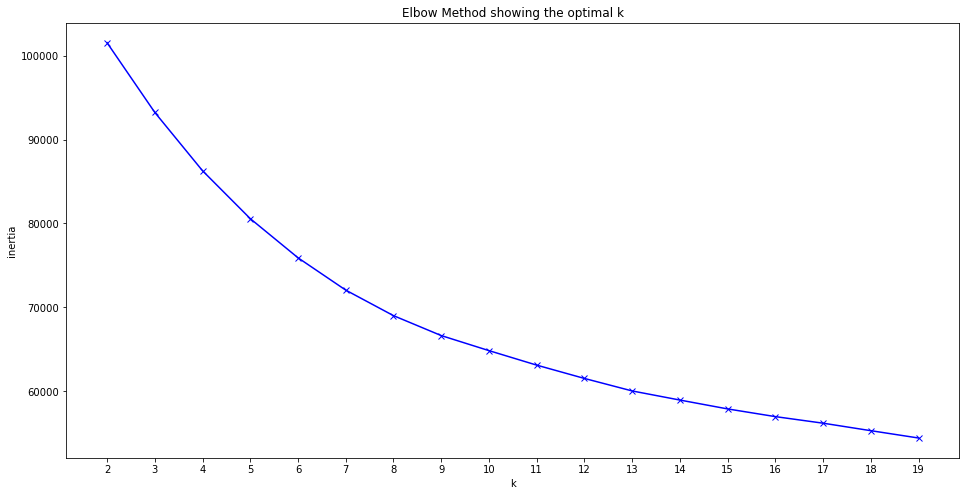

In [32]:
#finding out the optimal number of clusters for the features by using Elbow Method

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(feature_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

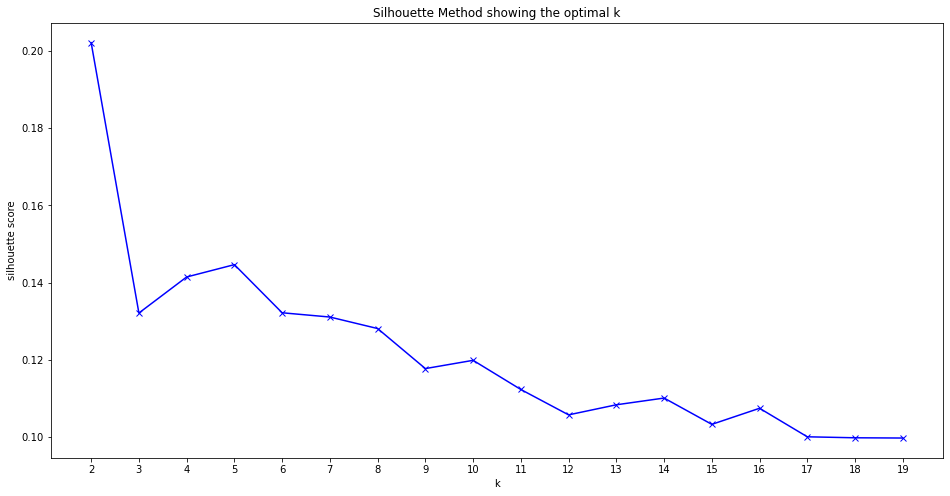

In [33]:
#finding out the optimal number of clusters for the features by using Silhouette Method

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(feature_prep)
    silhouette.append(silhouette_score(feature_prep, kmeans.predict(feature_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [34]:
kmeans = KMeans(n_clusters=6, random_state = 1234)
kmeans.fit(feature_prep)

clusters = kmeans.predict(feature_prep)
values = pd.Series(clusters).value_counts().sort_index

X_df = pd.DataFrame(clean_feature_df)
X_df["cluster"] = clusters
X_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
id,,,,,,,,,,,,,
2MvvoeRt8NcOXWESkxWn3g,0.511,0.472,4,-9.277,1,0.0910,0.534,0.614,0.1100,0.0399,127.978,258969,5
6UFivO2zqqPFPoQYsEMuCc,0.742,0.546,1,-7.694,1,0.0315,0.172,0.380,0.1150,0.8680,104.996,260520,3
4Musyaro0NM5Awx8b5c627,0.609,0.629,10,-5.024,1,0.0264,0.425,0.000,0.0978,0.3250,99.955,241467,3
1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8,-5.119,1,0.0294,0.131,0.000,0.0527,0.5220,104.945,228293,3
4lLtanYk6tkMvooU0tWzG8,0.706,0.558,2,-7.237,0,0.0593,0.146,0.000,0.1180,0.2270,110.443,223253,4


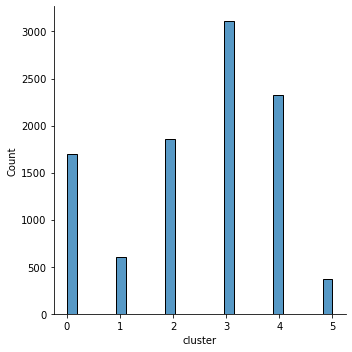

In [35]:
#plot the distribution of clusters
import seaborn as sns
sns.displot(X_df.cluster)
plt.show()

In [36]:
X_df.cluster.value_counts()

3    3111
4    2325
2    1858
0    1701
1     599
5     374
Name: cluster, dtype: int64

## Get user input & make recommendation

In [169]:
def song_recommendation_test(): #still needs work!
    
    import random
    song_input = input("Please enter a song here: ")

    if song_input in hot_songs['song'].values:
        recommendation = hot_songs['song'].sample()
        print("That's a hot song! Here is another hot recommendation for you: ")
        print("Song: {} from the artist: {}".format(hot_songs.loc[hot_songs.index][['artist','song']].values[0][1],
                                         hot_songs.loc[hot_songs.index][['artist','song']].values[0][0]))
    
    else:
    #get song features and convert them into a dataframe
        sample = sp.search(q=song_input, type='track')
        track_id = sample["tracks"]["items"][0]["id"]
        audio_features = sp.audio_features(track_id)
        song_features = pd.DataFrame(audio_features)

    #drop categorical culumns
        song_features.drop(['uri', 'track_href', 'analysis_url', 'time_signature', 'type', 'id'], axis = 1, inplace = True)
        
    #scale features
        song_features_scaled = StandardScaler().fit_transform(song_features)
    
    #predict cluster
        pcluster = kmeans.predict(song_features_scaled)
        #print(pcluster)
    
    #apply the cluster
        final_df_cluster = X_df[X_df['cluster'] == pcluster[0]].sample()
    
    #recommend song from same cluster
        x = random.choice(final_df_cluster.index)
        print("This song is not hot at the moment! But we think you'll like this one:")
        print("Song: {}, Artist: {}".format(final_df.loc[final_df_filtered.index][['song','artist']].values[0][0],
                                         final_df.loc[final_df_filtered.index][['song','artist']].values[0][1]))


# Song Recommendations | Prototype 3

    - get dataset from kaggle (including audio features)
    - create clusters and save cluster number of each song to dataframe
    - get user input  & make recommendation based on cluster if song is not in hot song list

In [39]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Reading in the dataset from kaggle

In [113]:
df_kaggle = pd.read_csv('dataset/data.csv')
df_kaggle

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


## Scaling (numerical) features and assign clusters

In [114]:
df_kaggle = df_kaggle.set_index("id")

In [115]:
df_kaggle = df_kaggle[['artists', 'name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

In [116]:
df_kaggle_num = df_kaggle.select_dtypes(np.number)
df_kaggle_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
id,,,,,,,,,,,,
0cS0A1fUEUd1EW3FcF8AEI,0.598,0.224,5,-12.628,0,0.0936,0.991000,0.000522,0.3790,0.6340,149.976,168333
0hbkKFIJm7Z05H8Zl9w30f,0.852,0.517,5,-7.261,0,0.0534,0.643000,0.026400,0.0809,0.9500,86.889,150200
11m7laMUgmOKqI3oYzuhne,0.647,0.186,0,-12.098,1,0.1740,0.993000,0.000018,0.5190,0.6890,97.600,163827
19Lc5SfJJ5O1oaxY0fpwfh,0.730,0.798,2,-7.311,1,0.0425,0.000173,0.801000,0.1280,0.0422,127.997,422087
2hJjbsLCytGsnAHfdsLejp,0.704,0.707,10,-6.036,0,0.0768,0.295000,0.000246,0.4020,0.2990,122.076,165224
...,...,...,...,...,...,...,...,...,...,...,...,...
46LhBf6TvYjZU2SMvGZAbn,0.792,0.866,6,-5.089,0,0.0356,0.009170,0.000060,0.1780,0.1860,125.972,147615
7tue2Wemjd0FZzRtDrQFZd,0.429,0.211,4,-11.665,1,0.0360,0.795000,0.000000,0.1960,0.2280,94.710,144720
48Qj61hOdYmUCFJbpQ29Ob,0.671,0.589,4,-12.393,0,0.0282,0.806000,0.920000,0.1130,0.7140,108.058,218147


In [117]:
df_kaggle_num.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,1.743890e+05
mean,0.536758,0.482721,5.205305,-11.750865,0.702384,0.105729,0.499228,0.197252,0.211123,0.524533,117.006500,2.328100e+05
std,0.176025,0.272685,3.518292,5.691591,0.457211,0.182260,0.379936,0.334574,0.180493,0.264477,30.254178,1.483958e+05
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.937000e+03
25%,0.414000,0.249000,2.000000,-14.908000,0.000000,0.035200,0.087700,0.000000,0.099200,0.311000,93.931000,1.661330e+05
50%,0.548000,0.465000,5.000000,-10.836000,1.000000,0.045500,0.517000,0.000524,0.138000,0.536000,115.816000,2.057870e+05
75%,0.669000,0.711000,8.000000,-7.499000,1.000000,0.076300,0.895000,0.252000,0.270000,0.743000,135.011000,2.657200e+05
max,0.988000,1.000000,11.000000,3.855000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,243.507000,5.338302e+06


In [118]:
df_prep = StandardScaler().fit_transform(df_kaggle_num)

In [119]:
scaler = StandardScaler().fit(df_kaggle_num)

In [120]:
pd.DataFrame(df_prep, columns=df_kaggle_num.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.347919,-0.948791,-0.058354,-0.154111,-1.536239,-0.066549,1.294358,-0.588004,0.930106,0.413903,1.089753,-0.434495
1,1.790898,0.125710,-0.058354,0.788862,-1.536239,-0.287113,0.378411,-0.510657,-0.721489,1.608718,-0.995485,-0.556689
2,0.626289,-1.088146,-1.479502,-0.060991,0.650940,0.374580,1.299622,-0.589511,1.705763,0.621861,-0.641450,-0.464860
3,1.097814,1.156204,-0.911043,0.780077,0.650940,-0.346918,-1.313529,1.804534,-0.460536,-1.823729,0.363273,1.275491
4,0.950107,0.822485,1.362794,1.004092,-1.536239,-0.158725,-0.537536,-0.588829,1.057535,-0.852753,0.167564,-0.455446


In [121]:
kmeans = KMeans(n_clusters=100,
                init="random",
                n_init=20,
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(df_prep)
print(kmeans.inertia_)

577081.8293027806


In [122]:
clusters = kmeans.predict(df_prep)
pd.Series(clusters).value_counts().sort_index()

0      978
1     2199
2     1691
3     1456
4     1498
      ... 
95    2738
96    1988
97     843
98    1505
99    1430
Length: 100, dtype: int64

In [123]:
X_df_ = pd.DataFrame(df_kaggle_num)
X_df_["cluster"] = clusters
X_df_

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
id,,,,,,,,,,,,,
0cS0A1fUEUd1EW3FcF8AEI,0.598,0.224,5,-12.628,0,0.0936,0.991000,0.000522,0.3790,0.6340,149.976,168333,73
0hbkKFIJm7Z05H8Zl9w30f,0.852,0.517,5,-7.261,0,0.0534,0.643000,0.026400,0.0809,0.9500,86.889,150200,6
11m7laMUgmOKqI3oYzuhne,0.647,0.186,0,-12.098,1,0.1740,0.993000,0.000018,0.5190,0.6890,97.600,163827,10
19Lc5SfJJ5O1oaxY0fpwfh,0.730,0.798,2,-7.311,1,0.0425,0.000173,0.801000,0.1280,0.0422,127.997,422087,38
2hJjbsLCytGsnAHfdsLejp,0.704,0.707,10,-6.036,0,0.0768,0.295000,0.000246,0.4020,0.2990,122.076,165224,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46LhBf6TvYjZU2SMvGZAbn,0.792,0.866,6,-5.089,0,0.0356,0.009170,0.000060,0.1780,0.1860,125.972,147615,93
7tue2Wemjd0FZzRtDrQFZd,0.429,0.211,4,-11.665,1,0.0360,0.795000,0.000000,0.1960,0.2280,94.710,144720,81
48Qj61hOdYmUCFJbpQ29Ob,0.671,0.589,4,-12.393,0,0.0282,0.806000,0.920000,0.1130,0.7140,108.058,218147,77


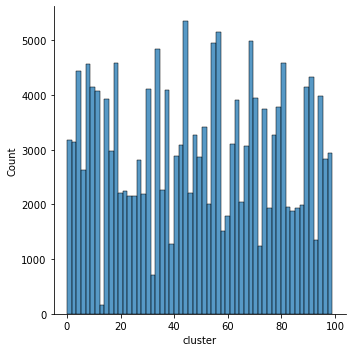

In [124]:
#plot the distribution of clusters
import seaborn as sns
sns.displot(X_df_.cluster)
plt.show()

In [125]:
X_df_.cluster.value_counts()

79    3786
56    3548
34    3264
55    3058
5     2938
      ... 
48     484
75     369
84     228
13     152
36      79
Name: cluster, Length: 100, dtype: int64

## Get user input & make recommendation

In [162]:
def song_recommendation():
    
    import random
    song_input = input("Please enter a song here: ")

    if song_input in hot_songs['song'].values:
        recommendation = hot_songs['song'].sample()
        #z = random.choice(hot_songs.index)
        print("That's a hot song! Here is another hot recommendation for you: ")
        print("Song: {} from the artist: {}".format(hot_songs.loc[hot_songs.index][['artist','song']].values[0][1],
                                         hot_songs.loc[hot_songs.index][['artist','song']].values[0][0]))
    
    else:
    #get song features and convert them into a dataframe
        sample = sp.search(q=song_input, type='track')
        track_id = sample["tracks"]["items"][0]["id"]
        audio_features = sp.audio_features(track_id)
        song_features = pd.DataFrame(audio_features)

    #drop same culumns as in final_df
        song_features.drop(['uri', 'track_href', 'analysis_url', 'time_signature', 'type','id'], axis = 1, inplace = True)
        
    #scale features
        song_features_scaled = scaler.transform(song_features)
    
    #predict cluster
        pcluster = kmeans.predict(song_features_scaled)
        #print(pcluster)
    
    #apply the filter (cluster)
        final_df_filtered = X_df_[X_df_['cluster'] == pcluster[0]].sample()
    
    #recommend song from same cluster
        x = random.choice(final_df_filtered.index)
        print("This song is not hot at the moment! But maybe you'll like this one:")
        print("Song: {} from the artist: {}".format(df_kaggle.loc[final_df_filtered.index][['name','artists']].values[0][0],
                                         df_kaggle.loc[final_df_filtered.index][['name','artists']].values[0][1]))
        #print(x)

In [163]:
song_recommendation()

Please enter a song here: Up
That's a hot song! Here is another hot recommendation for you: 
Song: Drivers License from the artist: Olivia Rodrigo


In [165]:
song_recommendation()

Please enter a song here: anna
This song is not hot at the moment! But maybe you'll like this one:
Song: Drunk on Your Love from the artist: ['Brett Eldredge']
